In [1]:
# Step 1: Import TensorFlow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

In [3]:
# Step 2: Load the MNIST dataset (60,000 training + 10,000 test images)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Normalize pixel values (0-255 → 0.0-1.0)
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 4: One-hot encode the labels (e.g., 5 → [0,0,0,0,0,1,0,0,0,0])
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# Step 5: Build a simple neural network
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    
    Flatten(),                            # Converts 28x28 image to 1D array of 784

    Dense(64, activation='relu'), 
    Dropout(0.5),
    Dense(32, activation='relu'), 
    Dropout(0.5),
    Dense(10, activation='softmax')       # Output layer (10 classes)
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model (you can increase epochs later)
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 8: Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.5759 - loss: 1.1861 - val_accuracy: 0.9785 - val_loss: 0.0805
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8835 - loss: 0.3693 - val_accuracy: 0.9835 - val_loss: 0.0645
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9105 - loss: 0.2852 - val_accuracy: 0.9848 - val_loss: 0.0550
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9273 - loss: 0.2390 - val_accuracy: 0.9870 - val_loss: 0.0516
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9321 - loss: 0.2189 - val_accuracy: 0.9892 - val_loss: 0.0435
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9845 - loss: 0.0491

Test Accuracy: 0.99


In [16]:
model.save('Digit.keras')

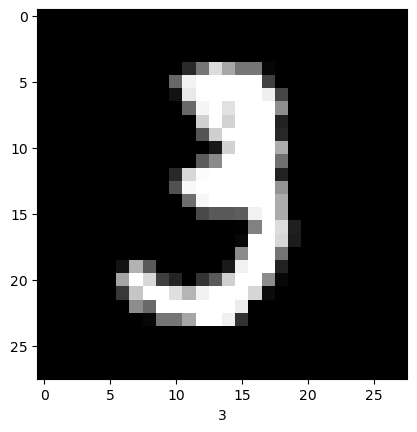

In [24]:
plt.imshow(x_train[10], cmap='gray')
plt.xlabel(y_train[10])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: 7 (Confidence: 1.00)


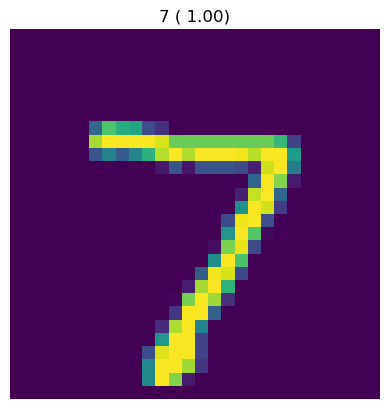

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: 2 (Confidence: 1.00)


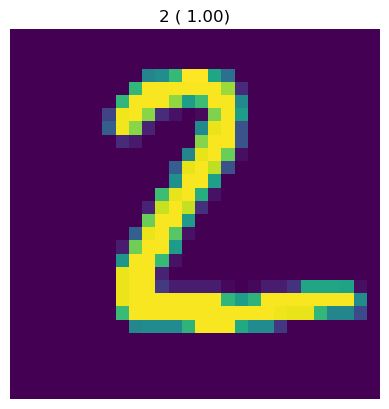

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: 1 (Confidence: 1.00)


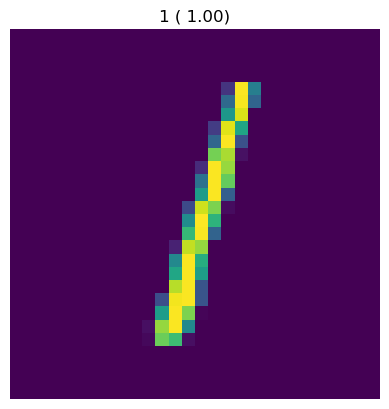

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: 0 (Confidence: 1.00)


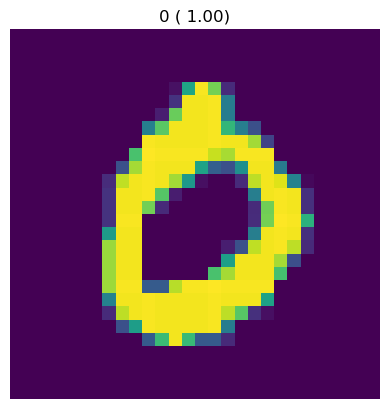

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: 4 (Confidence: 1.00)


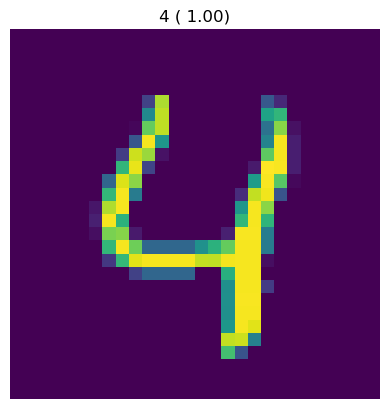

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

for i in range(5):
    
    img = x_test[i]

    # img = img.reshape(-1, 28, 28, 1)

    # img_arr = img / 255.0
    img_arr = img
    img_arr = np.expand_dims(img_arr, axis=-1)    # (28, 28) → (28, 28, 1)
    img_arr = np.expand_dims(img_arr, axis=0)     # → (1, 28, 28, 1)

    prediction = model.predict(img_arr)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted class: {predicted_label} (Confidence: {confidence:.2f})")

    plt.imshow(img)
    plt.title(f"{predicted_label} ({confidence: .2f})")
    plt.axis('off')
    plt.show()
    